In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso

# Task 1 (3 points + 2 bonus points for a well organized and easy to read plot + 1 bonus point for the short comment)

Consider the following toy dataset with pairs of correlated features:

In [18]:
def gen_data(N, correlation=0.5):
  # start from 4 independent features:
  X = np.random.uniform(-1., 1., size=(N, 4))

  y = X @ [2.3, -4.7, -1.7, 3.2] # true dependence

  # add correlations, so that X[:,0] correlates with X[:,2] and
  # X[:,1] correlates with X[:,3]:
  X[:,2:] = correlation * X[:,:2] + (1 - correlation) * X[:,2:]

  # add some noise to the targets
  y += np.random.normal(size=y.shape)

  return X, y

Fit this dataset with Ridge and Lasso (**without the bias term!**), for different correlation levels and various regularization powers.

Separately for Ridge and Lasso, and separately for different correlation levels, plot the fitted parameter values as a function of regularization power (x-axis in log scale). Make sure to make some color and pattern coding to make it clear which parameters correspond to correlating groups of features, e.g.:
```python
# Same color (red), different patterns (solid vs dashed) for features 0 and 2
plt.plot(alpha_values, param_0, color='red', label='0')
plt.plot(alpha_values, param_2, '--', color='red', label='2')

# Same color (blue), different patterns (solid vs dashed) for features 1 and 3
plt.plot(alpha_values, param_1, color='blue', label='1')
plt.plot(alpha_values, param_3, '--', color='blue', label='3')
```
Please also add legends, axis labels and/or titles to be able to understand what's shown on this or that plot.

What do you observe? How regularization affects the two kinds of models for different correlation levels? Write a short comment.

100%|██████████| 100/100 [00:00<00:00, 1639.25it/s]


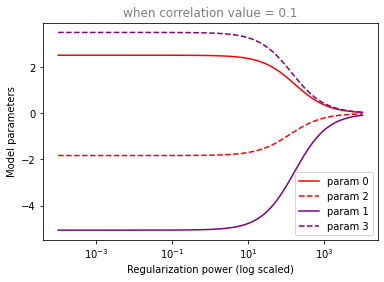

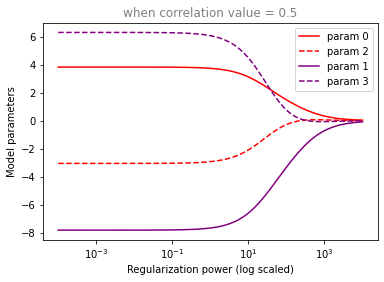

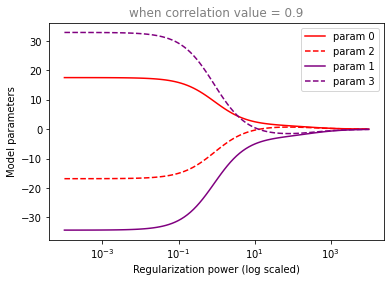

In [19]:
from tqdm import tqdm

for correlation in [0.1, 0.5, 0.9]:
  # dataset to fit (no need to split into train/test in this task):
  X, y = gen_data(500, correlation)
  # regularization powers:
  alpha_values = np.logspace(-4, 4, 100, base=10)

  # lists to collect models' parameters:
  params_ridge = []

  for alpha in tqdm(alpha_values):
    linear_model_Ridge = Ridge(alpha=alpha)   
    linear_model_Ridge.fit(X, y)

    params_ridge.append(linear_model_Ridge.coef_)

  params_ridge = np.array(params_ridge)
  param_ridge_0 = params_ridge[:, 0]
  param_ridge_1 = params_ridge[:, 1]
  param_ridge_2 = params_ridge[:, 2]
  param_ridge_3 = params_ridge[:, 3]

  plt.figure(figsize=(6, 4))

  
  # Same color (red), different patterns (solid vs dashed) for features 0 and 2
  plt.plot(alpha_values, param_ridge_0, color = 'red', label = 'param 0')
  plt.plot(alpha_values, param_ridge_2, '--', color = 'red', label = 'param 2')
  # Same color (blue), different patterns (solid vs dashed) for features 1 and 3
  plt.plot(alpha_values, param_ridge_1, color = 'purple', label = 'param 1')
  plt.plot(alpha_values, param_ridge_3, '--', color = 'purple', label = 'param 3')

  plt.title("when correlation value = " + str(correlation), fontsize = 12, color = 'gray')
  plt.ylabel('Model parameters')
  plt.xlabel('Regularization power (log scaled)')
  plt.legend()
  plt.xscale('log')






100%|██████████| 100/100 [00:00<00:00, 1239.68it/s]


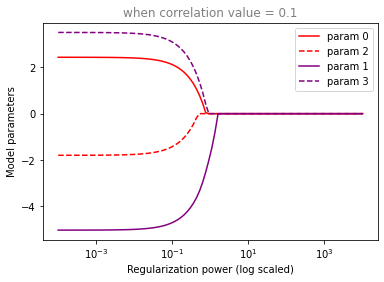

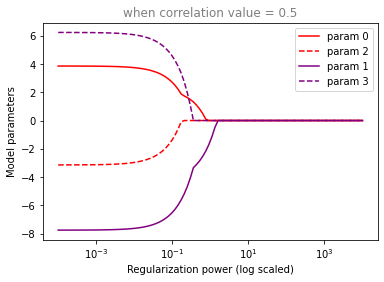

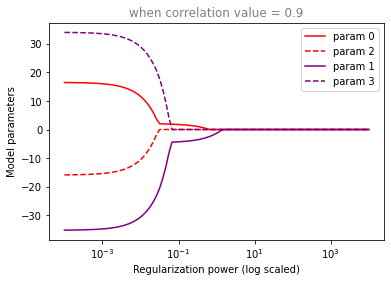

In [20]:
 for correlation in [0.1, 0.5, 0.9]:
  # dataset to fit (no need to split into train/test in this task):
  X, y = gen_data(500, correlation)

  # regularization powers:
  alpha_values = np.logspace(-4, 4, 100, base=10)


  # lists to collect models' parameters:
  params_lasso = []
  train_mse_Lasso =[]  
  for alpha in tqdm(alpha_values):
    linear_model_Lasso = Lasso(alpha=alpha, max_iter=100000)

    linear_model_Lasso .fit(X, y)

    params_lasso.append(linear_model_Lasso.coef_)


  params_lasso = np.array(params_lasso)
  params_lasso_0 = params_lasso[:,0]
  params_lasso_1 = params_lasso[:,1]
  params_lasso_2 = params_lasso[:,2]
  params_lasso_3 = params_lasso[:,3]


  plt.figure(figsize=(6, 4))


  # Same color (red), different patterns (solid vs dashed) for features 0 and 2
  plt.plot(alpha_values, params_lasso_0, color = 'red', label = 'param 0')
  plt.plot(alpha_values, params_lasso_2, '--', color = 'red', label = 'param 2')
  # Same color (blue), different patterns (solid vs dashed) for features 1 and 3
  plt.plot(alpha_values, params_lasso_1, color = 'purple', label = 'param 1')
  plt.plot(alpha_values, params_lasso_3, '--', color = 'purple', label = 'param 3')

  plt.title("when correlation value = " + str(correlation), fontsize = 12, color = 'gray')
  plt.ylabel('Model parameters')
  plt.xlabel('Regularization power (log scaled)')
  plt.legend()
  plt.xscale('log')


  

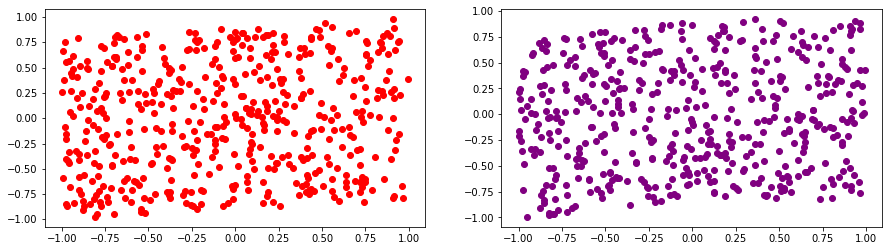

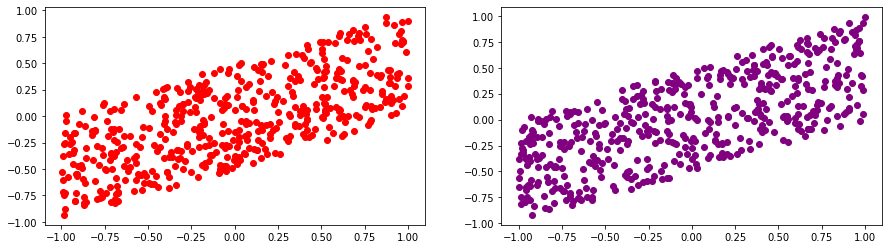

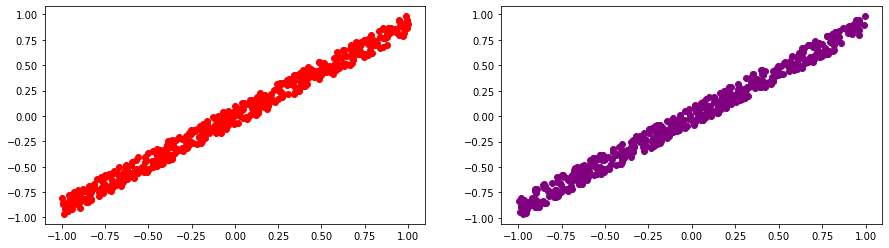

In [21]:
 for correlation in [0.1, 0.5, 0.9]:
  # dataset to fit (no need to split into train/test in this task):
  X, y = gen_data(500, correlation)
  plt.figure(figsize=(15, 4))
  plt.title("when correlation value = " + str(correlation))
  plt.subplot(1,2,1)
  plt.scatter(X[:,0],X[:,2] , label='data', color = 'red')
  plt.subplot(1,2,2)
  plt.scatter(X[:,1],X[:,3] , label='data',color='purple')
